## SID 10742495 This is my Machine Learning CourseWork 

## Importing all the libraries needed for the execution of the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Importing the dataset to be used for EDA and building of the model

In [2]:
data = pd.read_csv("HospInfo.csv")

In [3]:
#Displaying all the columns in the dataset

print(data.columns.values)

['Provider ID' 'Hospital Name' 'Address' 'City' 'State' 'ZIP Code'
 'County Name' 'Phone Number' 'Hospital Type' 'Hospital Ownership'
 'Emergency Services' 'Meets criteria for meaningful use of EHRs'
 'Hospital overall rating' 'Hospital overall rating footnote'
 'Mortality national comparison' 'Mortality national comparison footnote'
 'Safety of care national comparison'
 'Safety of care national comparison footnote'
 'Readmission national comparison'
 'Readmission national comparison footnote'
 'Patient experience national comparison'
 'Patient experience national comparison footnote'
 'Effectiveness of care national comparison'
 'Effectiveness of care national comparison footnote'
 'Timeliness of care national comparison'
 'Timeliness of care national comparison footnote'
 'Efficient use of medical imaging national comparison'
 'Efficient use of medical imaging national comparison footnote'
 'Location']


In [4]:
#show the first five instances in the dataset

data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [6]:
#checking out the total null counts helps me decide if they should be dropped completely or replaced with relevant values.
data.isnull().sum()

Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         144
Hospital overall rating                                             0
Hospital overall rating footnote                                 3414
Mortality national c

In [7]:
#Diving in to see what is in *footnote - Mostly description, not very informational in our work here.
data["Hospital overall rating footnote"].value_counts()

There are too few measures or measure groups reported to calculate a star rating or measure group score                                        995
Data are shown only for hospitals that participate in the Inpatient Quality Reporting (IQR) and Outpatient Quality Reporting (OQR) programs    159
This hospitals star rating only includes data reported on inpatient services                                                                  153
Data suppressed by CMS for one or more quarters                                                                                                 49
Results are not available for this reporting period                                                                                             42
Name: Hospital overall rating footnote, dtype: int64

In [8]:
#Those *footnote features will be dropped since the information is not relevant to this project.


data = data.drop(["Hospital overall rating footnote", "Mortality national comparison footnote", 
          "Safety of care national comparison footnote", "Readmission national comparison footnote",
         "Readmission national comparison footnote", "Patient experience national comparison footnote",
         "Effectiveness of care national comparison footnote", "Timeliness of care national comparison footnote",
         "Efficient use of medical imaging national comparison footnote", "County Name", "ZIP Code", "Meets criteria for meaningful use of EHRs", 
                  "Provider ID", "Phone Number"], axis=1)

In [9]:

data.isnull().sum()

Hospital Name                                           0
Address                                                 0
City                                                    0
State                                                   0
Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Hospital overall rating                                 0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness of care national comparison               0
Timeliness of care national comparison                  0
Efficient use of medical imaging national comparison    0
Location                                                0
dtype: int64

In [10]:
#There are a few more features to consider dropping before moving to the core areas - Hospital Name, Location and Address. 
data["Hospital Name"].value_counts()

MEMORIAL HOSPITAL                                     15
GOOD SAMARITAN HOSPITAL                                7
COMMUNITY MEMORIAL HOSPITAL                            7
ST JOSEPH HOSPITAL                                     7
ST JOSEPH MEDICAL CENTER                               6
                                                      ..
SAMARITAN PACIFIC COMMUNITY HOSPITAL                   1
DAVIESS COMMUNITY HOSPITAL                             1
SAGEWEST HEALTH CARE                                   1
ST LUKE'S HOSPITAL BETHLEHEM                           1
TRINITY MEDICAL CTR EAST &TRINITY MEDICAL CTR WEST     1
Name: Hospital Name, Length: 4623, dtype: int64

In [11]:
#count and return the values for each hospital address

data["Address"].value_counts()

100 HOSPITAL DRIVE          7
100 MEDICAL CENTER DRIVE    4
200 HOSPITAL DRIVE          4
ONE HOSPITAL DRIVE          3
200 SOMERSET STREET         2
                           ..
187 WOLFORD AVENUE          1
1015 WEST BALTIMORE PIKE    1
79-1019 HAUKAPILA STREET    1
800 RAVIN HILL DRIVE        1
PO BOX 43                   1
Name: Address, Length: 4784, dtype: int64

In [12]:
#count and return the values for each Location

data["Location"].value_counts()

105 WALL STREET\nPOTEAU, OK\n(35.043979, -94.612834)                2
11100 EUCLID AVENUE\nCLEVELAND, OH\n(41.507309, -81.60724)          2
301 W 7TH AVE\nBIG TIMBER, MT\n(45.82848, -109.952427)              1
1201 S MAIN ST\nCROWN POINT, IN\n(41.396497, -87.364436)            1
304 E 3RD STREET\nWASHINGTON, KS\n(39.817478, -97.045572)           1
                                                                   ..
300 FONT MARTELLO STREET\nHUMACAO, PR\n                             1
1240 HUFFMAN MILL RD\nBURLINGTON, NC\n(36.063749, -79.502528)       1
528 WASHINGTON HIGHWAY\nMORRISVILLE, VT\n(44.554192, -72.591349)    1
1000 NORTH 15TH STREET\nHUMBOLDT, IA\n(42.731835, -94.230216)       1
616 NORTH EIGHTH STREET\nOSAGE, IA\n(43.289076, -92.809482)         1
Name: Location, Length: 4810, dtype: int64

In [13]:
data = data.drop(["Address", "Hospital Name", "Location"], axis=1)

In [14]:
#Exploratory Data Analysis
# Count and return the values of different hospital types.
data["Hospital Type"].value_counts()

Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: Hospital Type, dtype: int64

<AxesSubplot:xlabel='Hospital Type', ylabel='count'>

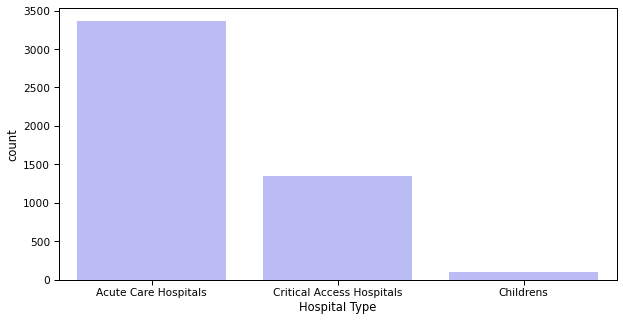

In [15]:
#The majority of the hospitals in the USA are acute care hospitals, followed by critical access, and children.

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale=1.2)
sns.countplot(x=data["Hospital Type"], data=data, color="blue", alpha=0.3)

In [16]:
data["Emergency Services"].value_counts()

True     4497
False     315
Name: Emergency Services, dtype: int64

<AxesSubplot:xlabel='Hospital Type', ylabel='count'>

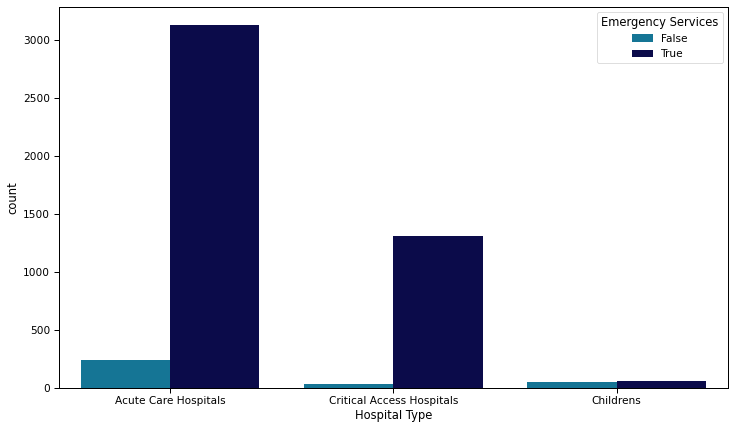

In [17]:
#display the emergency services per different hospital type.

plt.figure(figsize=(12,7))
sns.countplot(x="Hospital Type", data=data, hue="Emergency Services", palette="ocean_r")

<AxesSubplot:xlabel='Emergency Services', ylabel='count'>

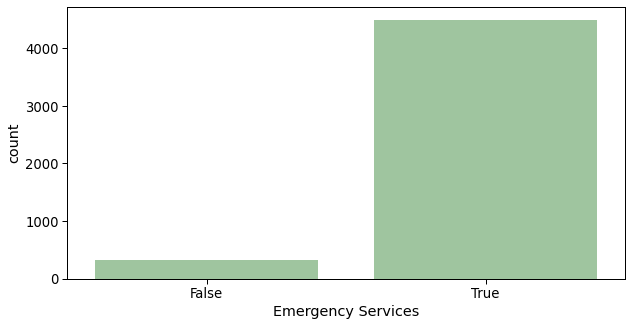

In [18]:
# graphical representations of Emergency Services

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="Emergency Services", data=data, color="green", alpha=0.4)

In [19]:
#Hospital Ownership display

data["Hospital Ownership"].value_counts()

Voluntary non-profit - Private                 2052
Proprietary                                     800
Government - Hospital District or Authority     561
Voluntary non-profit - Other                    462
Government - Local                              407
Voluntary non-profit - Church                   343
Physician                                        68
Government - State                               65
Government - Federal                             45
Tribal                                            9
Name: Hospital Ownership, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Hospital Ownership'>

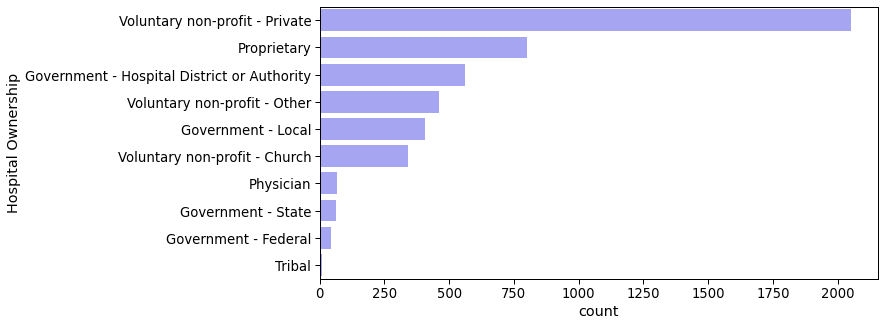

In [20]:
#The majority of the hospitals in the USA is private non-profit, government and faith-based. 
#This is followed by physician-owned hospitals and tribal-owned bottoms the list. 
#It is probably due to the total population of the tribes is relatively low compared to the non-tribes. 

plt.figure(figsize=(10, 5))
sns.set_context("paper", font_scale=1.5)
order = data["Hospital Ownership"].value_counts().sort_values(ascending=False).index
sns.countplot(y="Hospital Ownership", data=data, color="BLUE", alpha=0.4, order=order)

In [21]:
data["Hospital Ownership"].value_counts(normalize=True)*100

Voluntary non-profit - Private                 42.643392
Proprietary                                    16.625104
Government - Hospital District or Authority    11.658354
Voluntary non-profit - Other                    9.600998
Government - Local                              8.458022
Voluntary non-profit - Church                   7.128013
Physician                                       1.413134
Government - State                              1.350790
Government - Federal                            0.935162
Tribal                                          0.187032
Name: Hospital Ownership, dtype: float64

# Removing all the not available 
# Planned to drop the Not Available even though its count is significant. 
# Replacing it with the mean value does not provide us an accurate picture, 
# which is representative of the hospital rating in this country.


In [22]:
data["Hospital overall rating"].value_counts()

3                1761
Not Available    1245
4                 939
2                 678
1                 107
5                  82
Name: Hospital overall rating, dtype: int64

In [23]:

data = data.drop(data[data["Hospital overall rating"] == "Not Available"].index)

data["Hospital overall rating"].value_counts(normalize=True)*100

3    49.369218
4    26.324643
2    19.007569
1     2.999720
5     2.298851
Name: Hospital overall rating, dtype: float64

As expected, the majority of the hospitals in the USA falls under the average rating of 3 (49%). 
The extreme rating 1 and 5, with 5 being the best rating, have the lowest percentages. 
This is expected as it shows a very small number of hospitals (3%) are actually under-performed and 
it is very difficult for hospitals to obtain 5-star rating (only 2%) as performance is based on CMS value-based programs
and so forth. At this stage, it is hard to tell if hospitals have resources constraints as the barrier versus CMS requirements are too high.


<AxesSubplot:xlabel='Hospital overall rating', ylabel='count'>

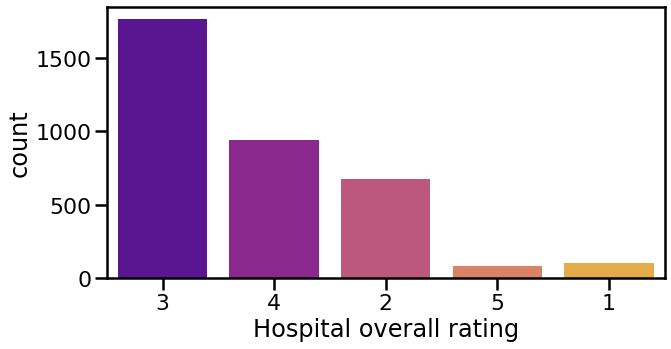

In [24]:
plt.figure(figsize=(10,5))

sns.set_context("poster", font_scale=1)

sns.countplot(x=data["Hospital overall rating"], palette="plasma")

Based on the graph above, it is safe to assume that the majority of the hospitals in the USA lean toward average to 
higher rating (average performers and over-achievers) with smaller percentage of them on the low-end side. 
In general, hospitals are performing better than worse based on CMS requirements with only abur less than a quarter ~21% are under=performing. This does not reflect the true picture of the current hospital performance; over-time tracking is required to see if hospitals are improving or declining.
Continuing analysis - will drop Not Available counts in all features.

In [25]:
data["Mortality national comparison"].value_counts()

Same as the national average    2592
Above the national average       400
Below the national average       341
Not Available                    234
Name: Mortality national comparison, dtype: int64

In [26]:
data = data.drop(data[data["Mortality national comparison"] == "Not Available"].index)

data["Mortality national comparison"].value_counts(normalize=True)*100

Same as the national average    77.767777
Above the national average      12.001200
Below the national average      10.231023
Name: Mortality national comparison, dtype: float64

<AxesSubplot:xlabel='Mortality national comparison', ylabel='count'>

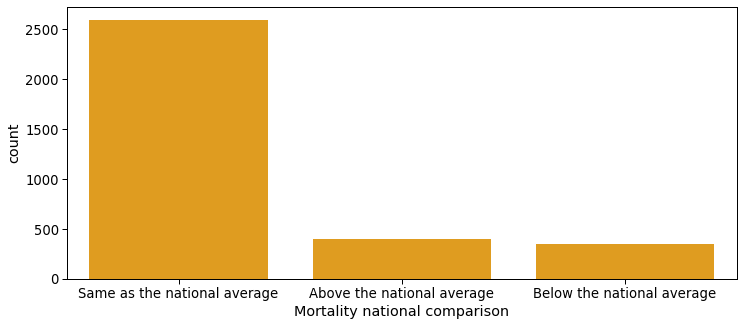

In [27]:
plt.figure(figsize=(12,5))

sns.set_context("paper", font_scale=1.5)

mortality_order = data["Mortality national comparison"].value_counts().sort_values(ascending=False).index

sns.countplot(x=data["Mortality national comparison"], color="orange", order=mortality_order)

In [28]:
data["Safety of care national comparison"].value_counts()

Same as the national average    1117
Not Available                    790
Above the national average       770
Below the national average       656
Name: Safety of care national comparison, dtype: int64

In [29]:
data = data.drop(data[data["Safety of care national comparison"] == "Not Available"].index)



In [30]:
data["Safety of care national comparison"].value_counts(normalize=True)*100

Same as the national average    43.924499
Above the national average      30.279198
Below the national average      25.796304
Name: Safety of care national comparison, dtype: float64

<AxesSubplot:xlabel='Safety of care national comparison', ylabel='count'>

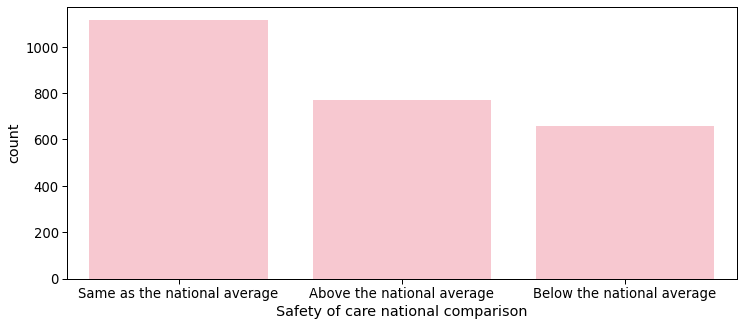

In [31]:
plt.figure(figsize=(12,5))

sns.countplot(x=data["Safety of care national comparison"], color="pink")

In [32]:
data["Readmission national comparison"].value_counts()

Same as the national average    967
Below the national average      808
Above the national average      768
Name: Readmission national comparison, dtype: int64

In [33]:
data["Safety of care national comparison"].value_counts(normalize=True)*100

Same as the national average    43.924499
Above the national average      30.279198
Below the national average      25.796304
Name: Safety of care national comparison, dtype: float64

<AxesSubplot:xlabel='Readmission national comparison', ylabel='count'>

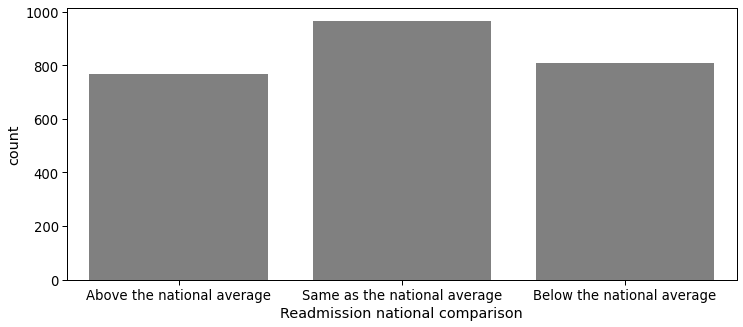

In [34]:
plt.figure(figsize=(12,5))

sns.countplot(x=data["Readmission national comparison"], color="grey")

In [35]:
data["Patient experience national comparison"].value_counts()

Below the national average      990
Same as the national average    839
Above the national average      704
Not Available                    10
Name: Patient experience national comparison, dtype: int64

In [36]:
data = data.drop(data[data["Patient experience national comparison"] == "Not Available"].index)


In [37]:

data["Patient experience national comparison"].value_counts(normalize=True)*100

Below the national average      39.084090
Same as the national average    33.122779
Above the national average      27.793131
Name: Patient experience national comparison, dtype: float64

<AxesSubplot:xlabel='Patient experience national comparison', ylabel='count'>

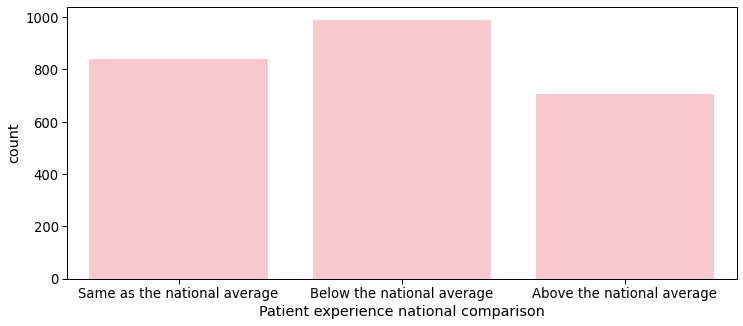

In [38]:
plt.figure(figsize=(12,5))

sns.countplot(x=data["Patient experience national comparison"], color="pink")

In [39]:
data["Effectiveness of care national comparison"].value_counts()

Same as the national average    2237
Below the national average       166
Above the national average       124
Not Available                      6
Name: Effectiveness of care national comparison, dtype: int64

In [40]:
data = data.drop(data[data["Effectiveness of care national comparison"] == "Not Available"].index)

In [41]:
data["Effectiveness of care national comparison"].value_counts(normalize=True)*100

Same as the national average    88.523941
Below the national average       6.569054
Above the national average       4.907004
Name: Effectiveness of care national comparison, dtype: float64

<AxesSubplot:xlabel='Effectiveness of care national comparison', ylabel='count'>

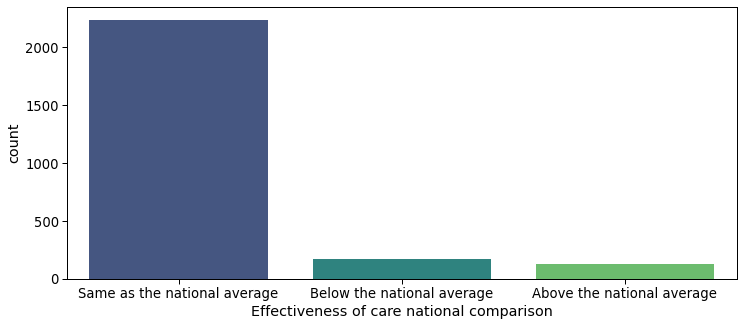

In [42]:
plt.figure(figsize=(12,5))

sns.countplot(x=data["Effectiveness of care national comparison"], palette="viridis")

In [43]:
data["Timeliness of care national comparison"].value_counts()

Same as the national average    1036
Below the national average       874
Above the national average       604
Not Available                     13
Name: Timeliness of care national comparison, dtype: int64

In [44]:
data = data.drop(data[data["Timeliness of care national comparison"] == "Not Available"].index)


In [45]:
data["Timeliness of care national comparison"].value_counts(normalize=True)*100

Same as the national average    41.209228
Below the national average      34.765314
Above the national average      24.025457
Name: Timeliness of care national comparison, dtype: float64

<AxesSubplot:xlabel='Timeliness of care national comparison', ylabel='count'>

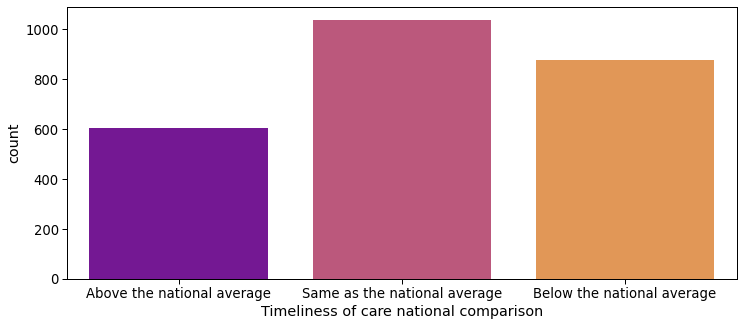

In [46]:
plt.figure(figsize=(12,5))

sns.countplot(x=data["Timeliness of care national comparison"], palette="plasma")

In [47]:
data["Efficient use of medical imaging national comparison"].value_counts()

Same as the national average    1639
Above the national average       356
Below the national average       306
Not Available                    213
Name: Efficient use of medical imaging national comparison, dtype: int64

In [48]:
data = data.drop(data[data["Efficient use of medical imaging national comparison"] == "Not Available"].index)


In [49]:
data["Efficient use of medical imaging national comparison"].value_counts(normalize=True)*100

Same as the national average    71.229900
Above the national average      15.471534
Below the national average      13.298566
Name: Efficient use of medical imaging national comparison, dtype: float64

<AxesSubplot:xlabel='Efficient use of medical imaging national comparison', ylabel='count'>

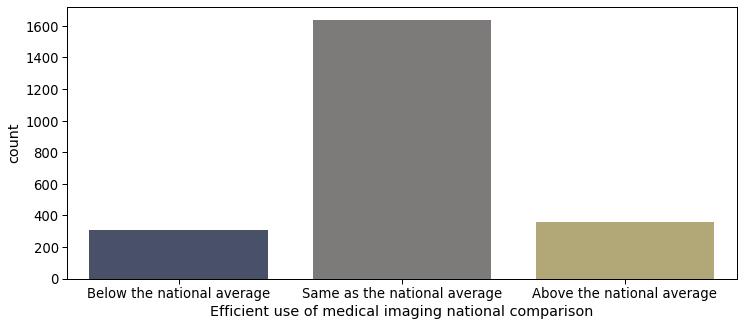

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(x=data["Efficient use of medical imaging national comparison"], palette="cividis")

# Explorative data analysis on CMS measures are complete. 


In [51]:
data["City"].value_counts()

CHICAGO         18
HOUSTON         13
PHILADELPHIA    12
WASHINGTON      10
SPRINGFIELD     10
                ..
ELIZABETHTON     1
BERLIN           1
STOCKTON         1
MINDEN           1
BARRE            1
Name: City, Length: 1477, dtype: int64

In [52]:
#The City data length has ~1400 and it is not feasible to create dummies to keep this feature. Putting them into fewer categories is not necessary as we have State as the location.¶

data = data.drop("City", axis=1)

In [53]:
#Normalizing the state
data["State"].value_counts(normalize=True)*100

CA    7.605389
TX    7.127336
FL    6.171230
PA    4.823990
NY    4.780530
IL    4.650152
OH    4.606693
MI    3.563668
NC    3.129074
GA    3.085615
IN    2.868318
VA    2.737940
TN    2.651021
MO    2.564103
NJ    2.520643
WI    2.477184
KY    2.259887
MA    2.172968
AL    2.129509
WA    1.912212
LA    1.825293
OK    1.825293
SC    1.781834
AZ    1.694915
CO    1.607997
MN    1.564537
MS    1.434159
KS    1.260322
AR    1.216862
CT    1.173403
OR    1.129944
IA    1.086484
WV    0.999565
NV    0.738809
NE    0.695350
UT    0.695350
ME    0.695350
NM    0.608431
NH    0.564972
ID    0.434594
SD    0.434594
MT    0.434594
RI    0.391134
HI    0.347675
DC    0.304216
WY    0.260756
DE    0.260756
ND    0.260756
VT    0.260756
AK    0.173837
Name: State, dtype: float64

Looks like the top 3 states that have the highest number of hospitals are CA, TX, and FL. Possibly due to the number of population, but I do not have the data to support this. It could be higher needs from sicker population in general, or just having excessive resources. These are just the preliminary impression.


Text(0.5, 0, 'Number of Hospitals')

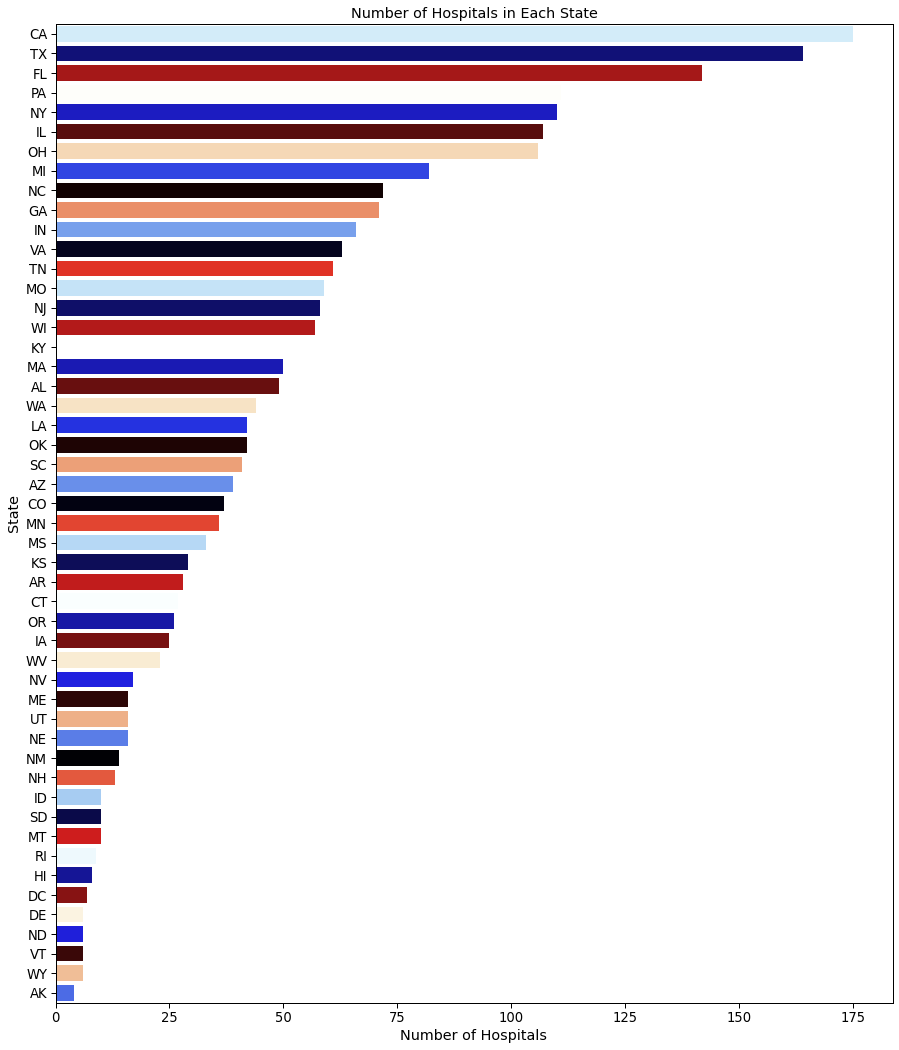

In [54]:

plt.figure(figsize=(15,18))
state_order = data["State"].value_counts().sort_values(ascending=False).index
sns.countplot(y=data["State"], palette="flag", order=state_order)
plt.title("Number of Hospitals in Each State")
plt.xlabel("Number of Hospitals")

Let's focus on the top 10 states that have the highest number of hospitals and their overall ratings. At a glance, TX has the highest number of hospitals with 5-star rating compared to the rest. In contrast, NY has the highest number of hospitals with 1-star rating compared to her counterparts.

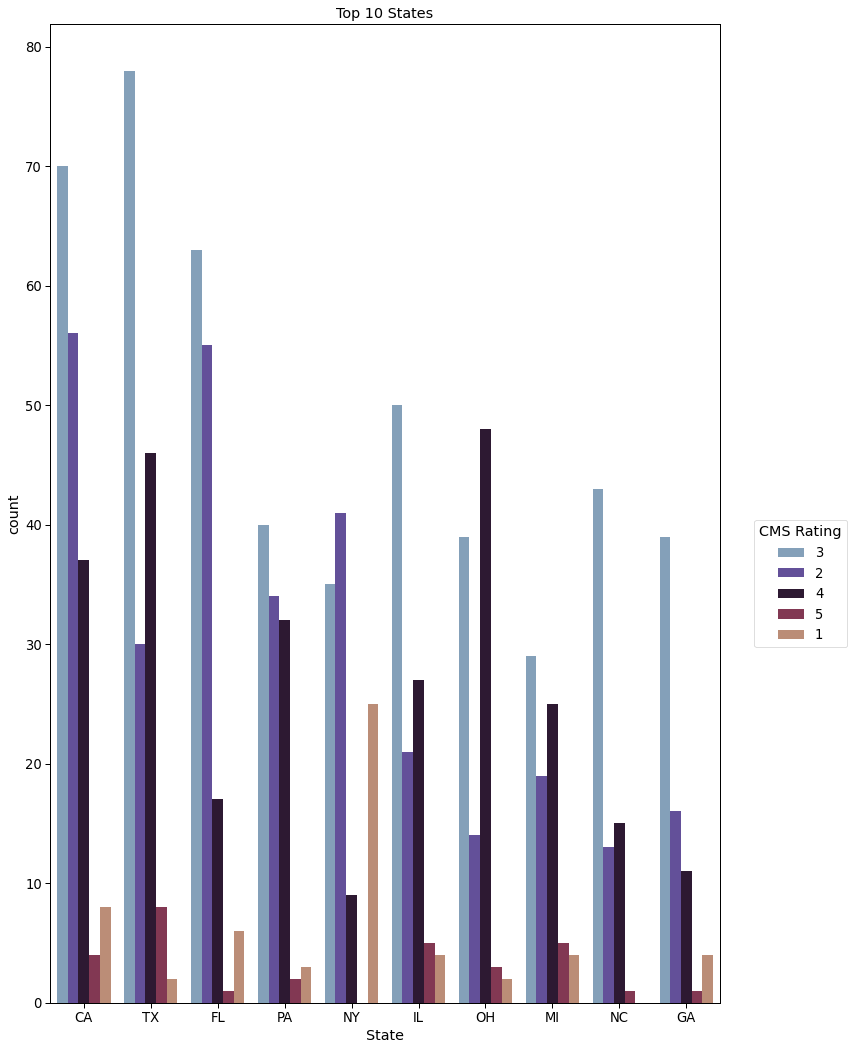

In [55]:

plt.figure(figsize=(12,18))
plt.title("Top 10 States")
state_order = data["State"].value_counts().sort_values(ascending=False)[:10].index
sns.countplot(x=data["State"], palette="twilight", order=state_order, data=data, hue="Hospital overall rating")
plt.legend(bbox_to_anchor=(1.2, 0.5), title="CMS Rating")

In [56]:
#Just out of curiousity, let's drilldown into the top 3 states.

len(data[data["State"] == "TX"])

164

In [57]:
data[data["State"] == "TX"]["Hospital overall rating"].value_counts()

3    78
4    46
2    30
5     8
1     2
Name: Hospital overall rating, dtype: int64

In [58]:
len(data[data["State"] == "FL"])

142

In [59]:
data[data["State"] == "FL"]["Hospital overall rating"].value_counts()

3    63
2    55
4    17
1     6
5     1
Name: Hospital overall rating, dtype: int64

In [60]:
len(data[data["State"] == "CA"])

175

In [61]:
data[data["State"] == "CA"]["Hospital overall rating"].value_counts()

3    70
2    56
4    37
1     8
5     4
Name: Hospital overall rating, dtype: int64

# Get  the length of all the Hospital  Overall Rating

In [62]:

len(data["Hospital overall rating"])

2301

In [63]:
data["Hospital overall rating"].value_counts()

3    1050
4     578
2     520
1      94
5      59
Name: Hospital overall rating, dtype: int64

There are a total of 59 hospitals with 5-star rating out of total 2297 hospitals in the USA (after data cleansing).
Fun fact: Given the dataset, the probability of picking a 5-star rating hospital in the USA is 2.56%.


In [64]:

high_star_prob = 59/len(data["Hospital overall rating"])*100
high_star_prob

2.564102564102564

Given the dataset, the probability of picking a 1-star rating hospital in the USA is 4.1%.


In [65]:
low_star_prob = 94/len(data["Hospital overall rating"])*100
low_star_prob

4.085180356366798

Given the dataset, the probability of picking a 5-star rating hospital in the USA that is from Texas is 0.35%.


In [66]:
texas_high_prob = (8/164)
texas_usa_prob = (164/2297)
texas_high_usa_prob = (texas_high_prob*texas_usa_prob)*100
texas_high_usa_prob

0.34828036569438403

Given the dataset, the probability of picking a 1-star rating hospital in the USA that is from New York is 1.1%.


In [67]:

newyork_low_prob = 25/110 
newyork_usa_prob = 110/2297
newyork_low_usa_prob = (newyork_low_prob*newyork_usa_prob)*100
newyork_low_usa_prob

1.0883761427949499

It's time to look into the data type and prepare for machine learning. Noted that all are objects.


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   State                                                 2301 non-null   object
 1   Hospital Type                                         2301 non-null   object
 2   Hospital Ownership                                    2301 non-null   object
 3   Emergency Services                                    2301 non-null   bool  
 4   Hospital overall rating                               2301 non-null   object
 5   Mortality national comparison                         2301 non-null   object
 6   Safety of care national comparison                    2301 non-null   object
 7   Readmission national comparison                       2301 non-null   object
 8   Patient experience national comparison                2301 non-null 

## Getting dummy data on features and convert the state attribute to binary numbers and drop the state column using one-hot encode.

In [69]:
clean_state = pd.get_dummies(data["State"], prefix="State_", drop_first=True, dtype=int)

data = pd.concat([data.drop("State", axis=1), clean_state], axis=1)


In [70]:
data.head()

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,State__SD,State__TN,State__TX,State__UT,State__VA,State__VT,State__WA,State__WI,State__WV,State__WY
0,Acute Care Hospitals,Government - Hospital District or Authority,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0
1,Acute Care Hospitals,Proprietary,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0
4,Acute Care Hospitals,Proprietary,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,0,0,0,0,0
18,Acute Care Hospitals,Voluntary non-profit - Private,True,2,Below the national average,Below the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,0,0,0,0,0
20,Acute Care Hospitals,Voluntary non-profit - Private,True,4,Same as the national average,Same as the national average,Above the national average,Above the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,0,0,0,0,0


Display the new data instances

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 4811
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Type                                         2301 non-null   object
 1   Hospital Ownership                                    2301 non-null   object
 2   Emergency Services                                    2301 non-null   bool  
 3   Hospital overall rating                               2301 non-null   object
 4   Mortality national comparison                         2301 non-null   object
 5   Safety of care national comparison                    2301 non-null   object
 6   Readmission national comparison                       2301 non-null   object
 7   Patient experience national comparison                2301 non-null   object
 8   Effectiveness of care national comparison             2301 non-null 

In [72]:
dummy_column = data.iloc[:, 0:3]

clean_column = pd.get_dummies(dummy_column, drop_first=True, dtype=int)

data = pd.concat([data.drop(dummy_column, axis=1), clean_column], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 4811
Data columns (total 67 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Hospital overall rating                                         2301 non-null   object
 1   Mortality national comparison                                   2301 non-null   object
 2   Safety of care national comparison                              2301 non-null   object
 3   Readmission national comparison                                 2301 non-null   object
 4   Patient experience national comparison                          2301 non-null   object
 5   Effectiveness of care national comparison                       2301 non-null   object
 6   Timeliness of care national comparison                          2301 non-null   object
 7   Efficient use of medical imaging national comparison        

Re-arranginng the dataset to bring the target values to the first column

In [73]:
dummy_columns = data.iloc[:, 1:8]

clean_columns = pd.get_dummies(dummy_columns, drop_first=True, dtype=int)

data = pd.concat([data.drop(dummy_columns, axis=1), clean_columns], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 4811
Data columns (total 74 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Hospital overall rating                                                            2301 non-null   object
 1   State__AL                                                                          2301 non-null   int32 
 2   State__AR                                                                          2301 non-null   int32 
 3   State__AZ                                                                          2301 non-null   int32 
 4   State__CA                                                                          2301 non-null   int32 
 5   State__CO                                                                          2301 non-null   int32 
 6   

In [74]:
#The y-variable ("Hospital overall rating) will be converted from object to int.

data["Hospital overall rating"] = data["Hospital overall rating"].astype(str).astype(int)

In [75]:
data["Hospital overall rating"].value_counts()

3    1050
4     578
2     520
1      94
5      59
Name: Hospital overall rating, dtype: int64

In [76]:
data.describe()

,Hospital overall rating,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,...,Readmission national comparison_Below the national average,Readmission national comparison_Same as the national average,Patient experience national comparison_Below the national average,Patient experience national comparison_Same as the national average,Effectiveness of care national comparison_Below the national average,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Same as the national average
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.00000,2301.000000,2301.000000,2301.000000,2301.000000,...,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000
mean,2.994785,0.021295,0.012169,0.016949,0.076054,0.01608,0.011734,0.003042,0.002608,0.061712,...,0.327684,0.353325,0.378096,0.333768,0.063451,0.883963,0.352890,0.413733,0.132986,0.712299
std,0.862236,0.144398,0.109662,0.129109,0.265142,0.12581,0.107710,0.055084,0.051009,0.240685,...,0.469471,0.478106,0.485017,0.471660,0.243825,0.320338,0.477973,0.492609,0.339633,0.452789
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
data.dtypes

Hospital overall rating                                                              int32
State__AL                                                                            int32
State__AR                                                                            int32
State__AZ                                                                            int32
State__CA                                                                            int32
                                                                                     ...  
Effectiveness of care national comparison_Same as the national average               int32
Timeliness of care national comparison_Below the national average                    int32
Timeliness of care national comparison_Same as the national average                  int32
Efficient use of medical imaging national comparison_Below the national average      int32
Efficient use of medical imaging national comparison_Same as the national average    int32

In [78]:
data

,Hospital overall rating,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,...,Readmission national comparison_Below the national average,Readmission national comparison_Same as the national average,Patient experience national comparison_Below the national average,Patient experience national comparison_Same as the national average,Effectiveness of care national comparison_Below the national average,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Same as the national average
0,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,3,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,3,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
18,2,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
20,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4806,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4807,3,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
4810,3,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1


In [79]:
#Importing sci-kit learn libraries. 
from sklearn.model_selection import train_test_split

In [80]:
#Creating variables for X and y. Our target is to predict hospital rating, thus, our y variable is "Hospital overal rating". The rest will be our X variable.

X = data.drop("Hospital overall rating", axis=1)

y = data["Hospital overall rating"]

In [81]:
#Setting data for training at 80%, test data at 20%. Random state will be used so it will produce the same random 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
#K-nearest neighbor
#K-nearest neighbor - a random number for the K-value or the n_neighbors of 10 will be used.


from sklearn.neighbors import KNeighborsClassifier

neighbor = KNeighborsClassifier(n_neighbors=10)

neighbor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [83]:
neighbor_predict = neighbor.predict(X_test)

              precision    recall  f1-score   support

           1       0.42      0.18      0.25        28
           2       0.50      0.57      0.53       104
           3       0.64      0.70      0.67       215
           4       0.59      0.51      0.55       103
           5       0.00      0.00      0.00        11

    accuracy                           0.58       461
   macro avg       0.43      0.39      0.40       461
weighted avg       0.57      0.58      0.57       461



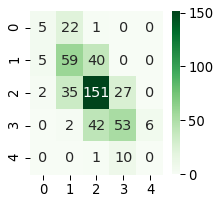

In [84]:
#Training and prediction complete. Now let's evaluate

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, neighbor_predict))

# print(confusion_matrix(y_test, neighbor_predict))
cm = confusion_matrix(y_test, neighbor_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.8g')
plt.show()

In [85]:
# The accurate is 85% with n_neighbors set as 10, which was a random number. Noted that recall value on 1 is only 0.59 and the F1-score is only 68%. However, we have to consider the imbalanced data - the test size for 1 (the better rating group) is only about 30% of the dataset.
# Now I will try to optimize the model by finding the best K-value in range 1 to 40, which is also arbitrary, and see if we can improve the score.

error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(X_train, y_train)
    knnpredict = neighbor.predict(X_test)
    error_rate.append(np.mean(knnpredict != y_test))

Text(0, 0.5, 'Error Rate')

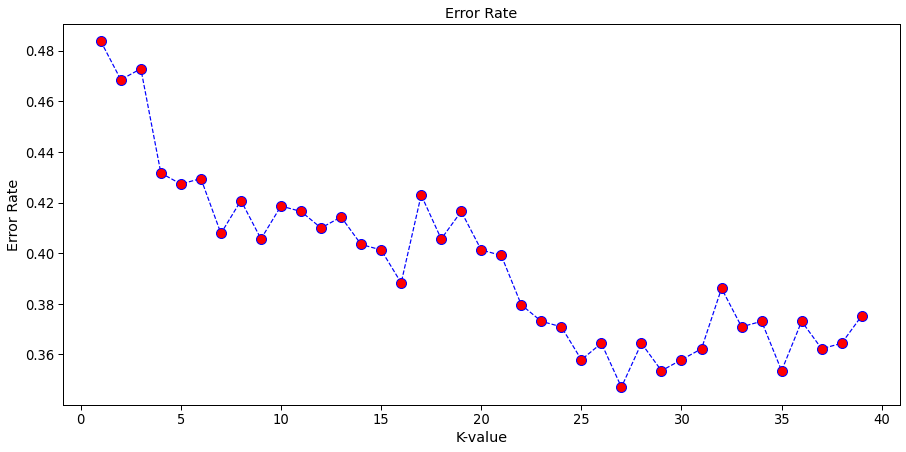

In [86]:
# The graph below shows the error rate trend in the elbow method. Noted that K-value 10 to 40 gives as a steady trend, hovering from 0.14 to 0.16 error rate. It is logical to pick the K-value that gives us the lowest error rate. In this case, I will pick 19 since it is the starting point of downtrend. N_neighbors will be set at 19 and retraint he model.

plt.figure(figsize=(15,7))
plt.plot(range(1,40), error_rate, color="blue", ls="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [87]:
#Support Vector Machines
from sklearn.svm import SVC

support = SVC(random_state=42)
support.fit(X_train, y_train)

SVC(random_state=42)

In [88]:
support_predict = support.predict(X_test)

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.59      0.80      0.68       104
           3       0.75      0.79      0.77       215
           4       0.72      0.68      0.70       103
           5       0.00      0.00      0.00        11

    accuracy                           0.70       461
   macro avg       0.41      0.45      0.43       461
weighted avg       0.65      0.70      0.67       461



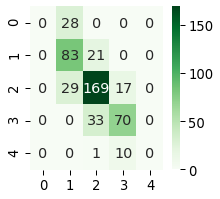

In [89]:
print(classification_report(y_test, support_predict))
# print(confusion_matrix(y_test, support_predict))
cm = confusion_matrix(y_test, support_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.8g')
plt.show()

In [90]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [91]:
random_forest_predict = random_forest.predict(X_test)


              precision    recall  f1-score   support

           1       0.36      0.14      0.21        28
           2       0.56      0.66      0.61       104
           3       0.71      0.76      0.73       215
           4       0.67      0.58      0.62       103
           5       0.00      0.00      0.00        11

    accuracy                           0.64       461
   macro avg       0.46      0.43      0.43       461
weighted avg       0.63      0.64      0.63       461



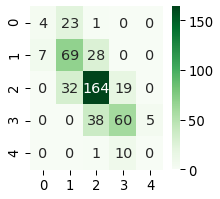

In [92]:
print(classification_report(y_test, random_forest_predict))
# print(confusion_matrix(y_test, random_forest_predict))
cm = confusion_matrix(y_test, random_forest_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.8g')
plt.show()

In [93]:
# Mapping the target value to 0's and 1's

In [94]:
data["Hospital overall rating"] = data["Hospital overall rating"].map({1:0, 2:0, 3:0, 4:1, 5:1})

In [95]:
data["Hospital overall rating"].value_counts()

0    1664
1     637
Name: Hospital overall rating, dtype: int64

In [96]:
data.describe()

,Hospital overall rating,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,...,Readmission national comparison_Below the national average,Readmission national comparison_Same as the national average,Patient experience national comparison_Below the national average,Patient experience national comparison_Same as the national average,Effectiveness of care national comparison_Below the national average,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Same as the national average
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.00000,2301.000000,2301.000000,2301.000000,2301.000000,...,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000
mean,0.276836,0.021295,0.012169,0.016949,0.076054,0.01608,0.011734,0.003042,0.002608,0.061712,...,0.327684,0.353325,0.378096,0.333768,0.063451,0.883963,0.352890,0.413733,0.132986,0.712299
std,0.447532,0.144398,0.109662,0.129109,0.265142,0.12581,0.107710,0.055084,0.051009,0.240685,...,0.469471,0.478106,0.485017,0.471660,0.243825,0.320338,0.477973,0.492609,0.339633,0.452789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
from sklearn.model_selection import train_test_split
#Creating variables for X and y. Our target is to predict hospital rating, thus, our y variable is "Hospital overal rating". The rest will be our X variable.


In [98]:
X = data.drop("Hospital overall rating", axis=1)
y = data["Hospital overall rating"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=10)
neighbor.fit(X_train, y_train)
neighbor_predict = neighbor.predict(X_test)

In [101]:

neighbor = KNeighborsClassifier(n_neighbors=10)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       347
           1       0.80      0.61      0.69       114

    accuracy                           0.87       461
   macro avg       0.84      0.78      0.80       461
weighted avg       0.86      0.87      0.86       461



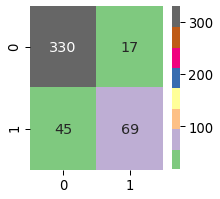

In [102]:
print(classification_report(y_test, neighbor_predict))
# print(confusion_matrix(y_test, neighbor_predict))
cm = confusion_matrix(y_test,neighbor_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Accent', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


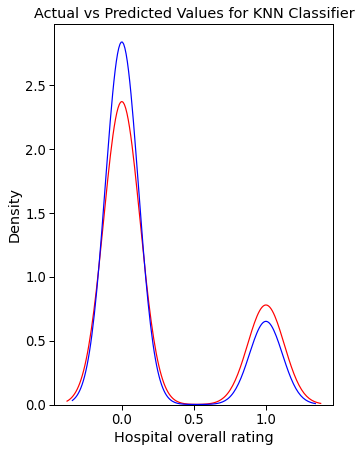

In [103]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(neighbor_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for KNN Classifier')


plt.show()
plt.close()

In [104]:
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(X_train, y_train)
    knnpredict = neighbor.predict(X_test)
    error_rate.append(np.mean(knnpredict != y_test))

Text(0, 0.5, 'Error Rate')

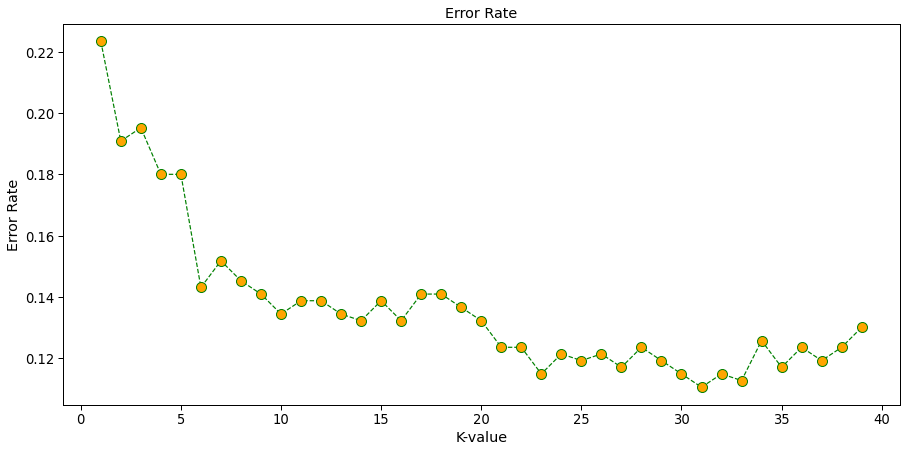

In [105]:
plt.figure(figsize=(15,7))
plt.plot(range(1,40), error_rate, color="green", ls="dashed", marker="o", markerfacecolor="orange", markersize=10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [108]:
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

# KNN with hyperparameter Grid Search Cross validation
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}
                   
# with GridSearch
grid_search = GridSearchCV(estimator=estimator_KNN, param_grid=parameters_KNN, scoring = 'accuracy', n_jobs = -1,cv = 5)
    

In [109]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [110]:
grid_search_predict = grid_search.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       347
           1       0.78      0.59      0.67       114

    accuracy                           0.86       461
   macro avg       0.83      0.77      0.79       461
weighted avg       0.85      0.86      0.85       461

Training Accuracy: 0.8744565217391305
Test Accuracy: 0.8568329718004338


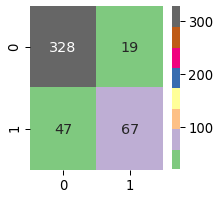

In [111]:
print(classification_report(y_test, grid_search_predict))
# print(confusion_matrix(y_test, neighbor_predict))

print("Training Accuracy:", grid_search.score(X_train, y_train) )
print("Test Accuracy:", grid_search.score(X_test, y_test) )

cm = confusion_matrix(y_test,grid_search_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Accent', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


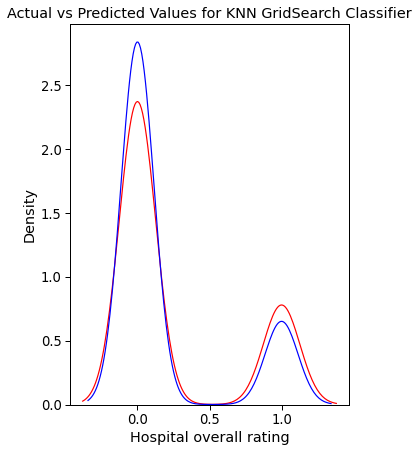

In [112]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(grid_search_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for KNN GridSearch Classifier')


plt.show()
plt.close()

In [ ]:
# Support Vector Machine

In [113]:
support = SVC(random_state=42)
support.fit(X_train, y_train)
SVC(random_state=42)
support_predict = support.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       347
           1       0.81      0.69      0.75       114

    accuracy                           0.89       461
   macro avg       0.86      0.82      0.84       461
weighted avg       0.88      0.89      0.88       461

Training Accuracy: 0.9163043478260869
Test Accuracy: 0.8850325379609545


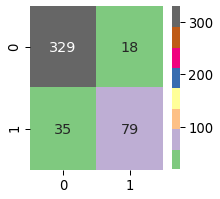

In [114]:
print(classification_report(y_test, support_predict))

print("Training Accuracy:", support.score(X_train, y_train) )
print("Test Accuracy:", support.score(X_test, y_test) )

cm = confusion_matrix(y_test,support_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Accent', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


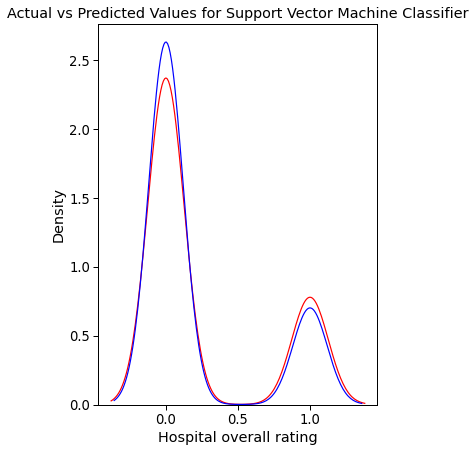

In [115]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(support_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Support Vector Machine Classifier')


plt.show()
plt.close()

In [118]:
#applying Gridsearchcv to find the best model
from sklearn import svm
parameters = [{'C': [1,10,100], 'kernel': ['linear']}] #svc_p_dist={'kernel':['linear','poly','rbf'],
grid_search = GridSearchCV(estimator= svm.SVC(),
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(X_train, y_train)

In [119]:
accuracy = grid_search.best_score_ *100

In [120]:
print("Accuracy for our dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our dataset with tuning is : 87.17%


In [121]:
#applying Gridsearchcv to find the best model

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.717, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.717, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.723, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.715, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.785, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.812, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.799, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.815, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.886, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.867, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.880, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.851, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.894, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.859, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.842, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.856, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.875, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.886, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.864, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.886, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.861, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.891, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   24.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [122]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       347
           1       0.82      0.74      0.77       114

    accuracy                           0.89       461
   macro avg       0.87      0.84      0.85       461
weighted avg       0.89      0.89      0.89       461

Training Accuracy: 0.8940217391304348
Test Accuracy: 0.8937093275488069


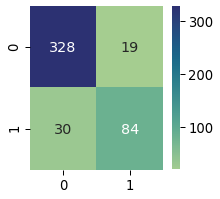

In [123]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

print("Training Accuracy:", grid.score(X_train, y_train) )
print("Test Accuracy:", grid.score(X_test, y_test) )
# pri
cm = confusion_matrix(y_test, grid_predictions)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'crest', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


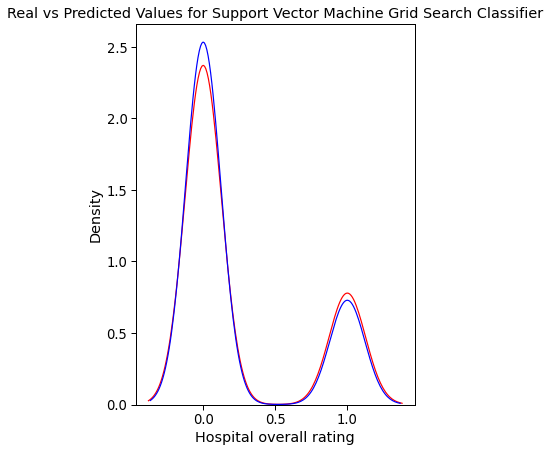

In [124]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(grid_predictions, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Real vs Predicted Values for Support Vector Machine Grid Search Classifier')


plt.show()
plt.close()

In [ ]:
# Random forest Model

In [125]:
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [126]:
random_forest_predict = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       347
           1       0.80      0.61      0.69       114

    accuracy                           0.87       461
   macro avg       0.84      0.78      0.80       461
weighted avg       0.86      0.87      0.86       461

Training Accuracy: 0.9885869565217391
Test Accuracy: 0.8655097613882863


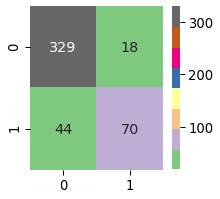

In [127]:
print(classification_report(y_test, random_forest_predict))
print("Training Accuracy:", random_forest.score(X_train, y_train) )
print("Test Accuracy:", random_forest.score(X_test, y_test) )
# print(confusion_matrix(y_test, random_forest_predict))
cm = confusion_matrix(y_test, random_forest_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Accent', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


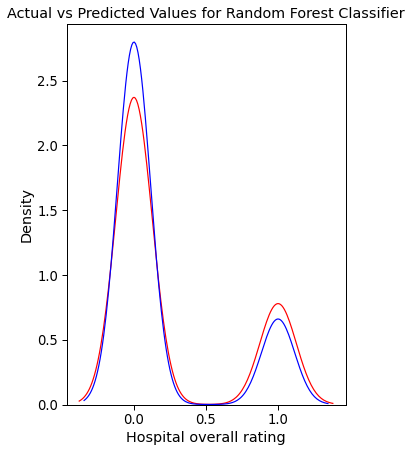

In [128]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(random_forest_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Random Forest Classifier')


plt.show()
plt.close()

In [129]:

from sklearn.model_selection import GridSearchCV, train_test_split
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [130]:
CV_rfc_predict = CV_rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.99      0.90       347
           1       0.90      0.41      0.57       114

    accuracy                           0.84       461
   macro avg       0.87      0.70      0.74       461
weighted avg       0.85      0.84      0.82       461

Training Accuracy: 0.8684782608695653
Test Accuracy: 0.8438177874186551


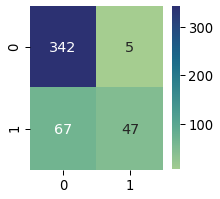

In [131]:
print(classification_report(y_test, CV_rfc_predict))
print("Training Accuracy:", CV_rfc.score(X_train, y_train) )
print("Test Accuracy:", CV_rfc.score(X_test, y_test) )
# print(confusion_matrix(y_test, random_forest_predict))
cm = confusion_matrix(y_test, CV_rfc_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'crest', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


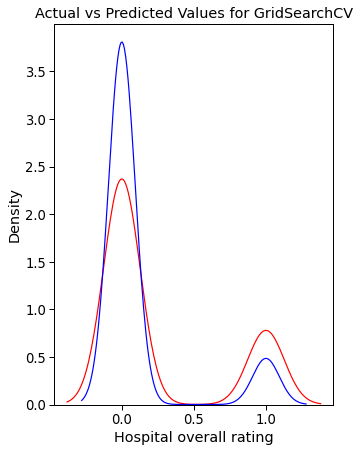

In [132]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(CV_rfc_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for GridSearchCV')


plt.show()
plt.close()

In [ ]:
# Decision Tree Model

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [134]:
decision_tree_predict = decision_tree.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       347
           1       0.66      0.67      0.66       114

    accuracy                           0.83       461
   macro avg       0.78      0.78      0.78       461
weighted avg       0.83      0.83      0.83       461

Training Accuracy: 0.9885869565217391
Test Accuracy: 0.8329718004338394


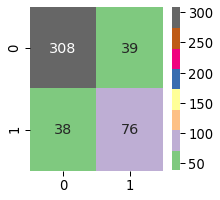

In [135]:
print(classification_report(y_test, decision_tree_predict))

print("Training Accuracy:", decision_tree.score(X_train, y_train) )
print("Test Accuracy:", decision_tree.score(X_test, y_test) )

cm = confusion_matrix(y_test, decision_tree_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Accent', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


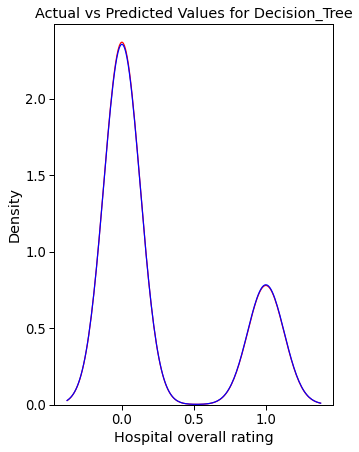

In [136]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(decision_tree_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Decision_Tree')


plt.show()
plt.close()

[Text(117.80037631798004, 160.26827586206898, 'X[65] <= 0.5\ngini = 0.407\nsamples = 1840\nvalue = [1317, 523]'),
 Text(78.51229536625972, 154.6448275862069, 'X[66] <= 0.5\ngini = 0.482\nsamples = 1165\nvalue = [693, 472]'),
 Text(47.62701859045505, 149.02137931034486, 'X[61] <= 0.5\ngini = 0.48\nsamples = 550\nvalue = [220, 330]'),
 Text(38.58700055493896, 143.39793103448278, 'X[63] <= 0.5\ngini = 0.426\nsamples = 439\nvalue = [135, 304]'),
 Text(30.168229744728084, 137.7744827586207, 'X[59] <= 0.5\ngini = 0.361\nsamples = 368\nvalue = [87, 281]'),
 Text(20.57663706992231, 132.15103448275863, 'X[64] <= 0.5\ngini = 0.284\nsamples = 321\nvalue = [55, 266]'),
 Text(14.491897891231966, 126.52758620689656, 'X[35] <= 0.5\ngini = 0.11\nsamples = 172\nvalue = [10, 162]'),
 Text(13.748723640399557, 120.9041379310345, 'X[32] <= 0.5\ngini = 0.1\nsamples = 171\nvalue = [9, 162]'),
 Text(13.005549389567149, 115.28068965517242, 'X[9] <= 0.5\ngini = 0.09\nsamples = 170\nvalue = [8, 162]'),
 Text(10.

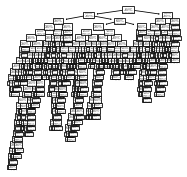

In [126]:
from sklearn import tree
tree.plot_tree(decision_tree)

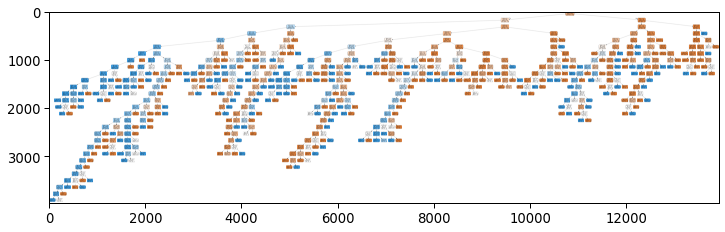

In [129]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(decision_tree, out_file=dot_data, rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

In [137]:
# Decision Tree with Grid Classifier

DT_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), DT_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [138]:
DT_predict = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       347
           1       0.75      0.68      0.71       114

    accuracy                           0.86       461
   macro avg       0.82      0.80      0.81       461
weighted avg       0.86      0.86      0.86       461

Training Accuracy: 0.904891304347826
Test Accuracy: 0.8633405639913232


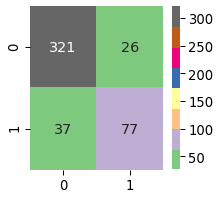

In [139]:
print(classification_report(y_test, DT_predict))

print("Training Accuracy:", clf.score(X_train, y_train) )
print("Test Accuracy:", clf.score(X_test, y_test) )

cm = confusion_matrix(y_test, DT_predict)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'Accent', fmt = '.8g')
plt.show()

C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Amakapc.LAPTOP-1UBS8G8S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


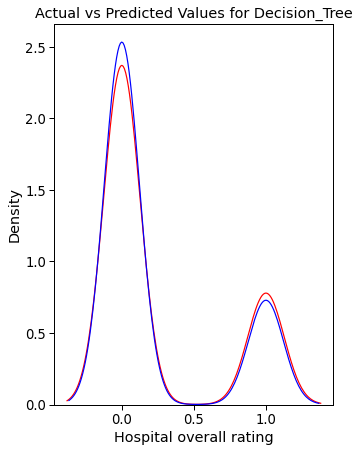

In [140]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(DT_predict, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Decision_Tree')


plt.show()
plt.close()

In [143]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Amakapc.LAPTOP-1UBS8G8S\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




## plot graph of feature importances for better visualization

[3.64270978e-03 2.72671677e-03 4.17983337e-03 1.10801694e-02
 6.87290516e-03 4.00240317e-03 4.25086098e-05 3.18443968e-03
 8.22206622e-03 9.15260143e-03 3.21203725e-03 4.08135843e-03
 4.66690478e-03 6.55891594e-03 1.05636793e-02 4.05077174e-03
 5.34849508e-03 5.27260175e-03 5.52028463e-03 2.51858491e-03
 1.04374308e-02 4.17748448e-03 6.24291526e-03 2.88302968e-03
 3.51062560e-03 8.47050308e-03 1.26095044e-03 3.02317483e-03
 3.98871973e-03 7.04533192e-03 3.67246141e-04 5.95815005e-04
 7.83388313e-03 1.21582889e-02 4.36661252e-03 4.52603570e-03
 8.71295927e-03 1.37143010e-03 5.30016571e-03 3.06999343e-03
 4.52987108e-03 1.08299343e-02 1.72980570e-03 4.75714182e-03
 1.32795015e-03 5.65890034e-03 8.32311424e-03 1.38461138e-03
 8.68529210e-04 4.82823907e-03 2.74948766e-05 7.91555044e-03
 6.58973088e-03 1.94604992e-03 2.40796783e-03 1.38500732e-02
 1.24024903e-02 1.53441023e-02 1.89814888e-02 4.23905879e-02
 3.68851181e-02 7.79034850e-02 5.24146490e-02 1.02637560e-01
 5.23212764e-02 1.178149

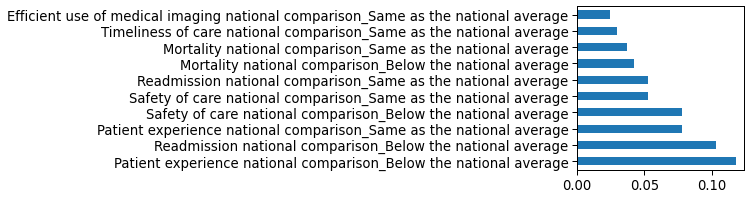

In [167]:
# feature importance using ExtraTreesClassifier
    
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()